In [1]:
import numpy as np
import pandas
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

In [2]:
# import data from csv
dataframe = pandas.read_csv('heart_full.csv',usecols = range(1,14), engine='python')
# dataframe = pandas.read_csv('heart.csv',usecols = range(0,14), engine='python')
# dataframe = pandas.read_csv('processed_cleveland.csv',usecols = range(0,14), engine='python')
dataset = dataframe.values

# seperate male
male_dataset = dataframe.loc[dataframe['sex'] == 0].values

# seperate female
female_dataset = dataframe.loc[dataframe['sex'] == 1].values

dataset = female_dataset


In [3]:
# shuffle dataset
np.random.shuffle(dataset)

# find col length
num_cols = dataset.shape[1]

# divide data (X) and targets (Y)
X = np.delete(dataset, obj=num_cols-1, axis=1)
Y = dataset[:,num_cols-1]

# normalize data (X)
X = sklearn.preprocessing.normalize(X, norm='l1', axis=0)


In [4]:
# method to calculate accuracy
def calcAccuracy(actual, predicted):
#     correct = 0
#     for i in range(0, len(actual)):
#         if actual[i] == predicted[i]:
#             correct += 1
#         print "Actual: {0} Predicted: {1}".format(actual[i], predicted[i])
#     return precision_score(actual, predicted)
#     return confusion_matrix(actual, predicted)
    return accuracy_score(actual, predicted, normalize = True)


# method to test train/test split by percentage
def splitByPercentageValidation(param, train_size=0.7):
    X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, train_size = train_size, random_state=2017)

    # run on test and train data
    clf = buildClf(X_train, Y_train, param)
    
    predicted = clf.predict(X_test)    
    test_accuracy = calcAccuracy(Y_test, predicted)
    
    predicted = clf.predict(X_train)
    train_accuracy = calcAccuracy(Y_train, predicted)
    
    return train_accuracy, test_accuracy


# method for k-fold cross validation
def kFoldValidation(param, n_splits=10):
    kFold = KFold(n_splits=n_splits)

    # run on test data
    test_results = []
    train_results = []
    for train_index, test_index in kFold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        # build classifier for each set
        clf = buildClf(X_train, Y_train, param)
        
        predicted = clf.predict(X_test)
        test_accuracy = calcAccuracy(Y_test, predicted)
        
        predicted = clf.predict(X_train)
        train_accuracy = calcAccuracy(Y_train, predicted)
        
        test_results.append(test_accuracy)
        train_results.append(train_accuracy)
#     return train_accuracy, test_accuracy
    return np.mean(train_results, axis = 0), np.mean(test_results, axis = 0)


# method for leave one out cross validation
def looValidation(param):
    loo = sklearn.model_selection.LeaveOneOut()

    # run on test data
    test_results = []
    train_results = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        # build classifier for each set
        clf = buildClf(X_train, Y_train, param)
        
        predicted = clf.predict(X_test)
        test_accuracy = calcAccuracy(Y_test, predicted)
        predicted = clf.predict(X_train)
        train_accuracy = calcAccuracy(Y_train, predicted)
#         print train_accuracy
        test_results.append(test_accuracy)
        train_results.append(train_accuracy)
#     return train_accuracy, test_accuracy
    return np.mean(train_results, axis = 0), np.mean(test_results, axis = 0)
    

In [28]:
# method to build classifier
def buildClf(train_data, train_target, param):
#     clf = DecisionTreeClassifier(max_depth=)
#     clf = GaussianNB()
#     clf = LogisticRegression()
#     clf = SVC()
    clf = RandomForestClassifier(n_estimators = param)  # 50
#     clf = KNeighborsClassifier(param)  # 10
#     clf = MultinomialNB()
#     clf = BernoulliNB()
#     clf = GaussianProcessClassifier()
#     clf = AdaBoostClassifier(n_estimators = param)  # 5
#     clf = GradientBoostingClassifier(n_estimators = param)  # 5
#     clf = QuadraticDiscriminantAnalysis()
#     clf = MLPClassifier()
#     clf = BaggingClassifier(QuadraticDiscriminantAnalysis(), max_samples=0.2, max_features=0.2)
#     clf = BaggingClassifier(GaussianNB(), max_samples=0.7, max_features=0.8)


    clf_1 = GaussianNB()
#     clf_1 = BaggingClassifier(GaussianNB(), max_samples=0.7, max_features=0.8)
    clf_2 = AdaBoostClassifier(n_estimators = param) # 5
    clf_3 = BernoulliNB()
#     clf = VotingClassifier(estimators=[('gnb', clf_1), ('ab', clf_2), ('bnb', clf_3)], voting='soft', weights = [1,2,1])
#     clf = VotingClassifier(   estimators=[('gnb', clf_1), ('ab', clf_2), ('bnb', clf_3)], voting='hard')
    
    clf.fit(train_data, train_target)
    return clf

In [ ]:
# results array format: [[train], [test]]
splitByPercentageResults = [[],[]]
kFoldResults = [[],[]]
looResults = [[],[]]

# run iterations
x = range(1, 100)
for param in x:
    print param
#     splitByPercentage_train, splitByPercentage_test = splitByPercentageValidation(param, 0.85)
#     kFold_train, kFold_test = kFoldValidation(param, 5)
    loo_train, loo_test = looValidation(param)
    
#     splitByPercentageResults[0].append(1-splitByPercentage_train)
#     splitByPercentageResults[1].append(1-splitByPercentage_test)
    
#     kFoldResults[0].append(1-kFold_train)
#     kFoldResults[1].append(1-kFold_test)
    
    looResults[0].append(1-loo_train)
    looResults[1].append(1-loo_test)


1
2
3
4


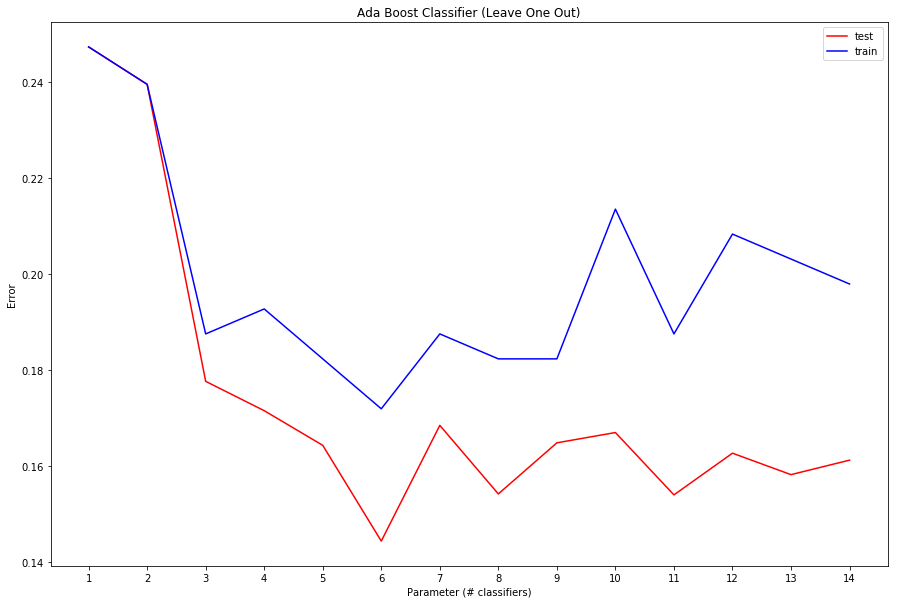

In [27]:
# plot graph
fig = plt.figure(figsize=(15,10))
plt.xlabel('Parameter (# classifiers)')
plt.ylabel('Error')
plt.title('Random Forest Classifier (Leave One Out)')
plt.plot(x, looResults[0], color='r', label='test')
plt.plot(x, looResults[1], color='b', label='train')
# plt.xticks(x)
plt.legend()
plt.show()

In [ ]:
param = 8

splitByPercentage_train, splitByPercentage_test = splitByPercentageValidation(param, 0.85)
kFold_train, kFold_test = kFoldValidation(param, 5)
loo_train, loo_test = looValidation(param)

print "-----Train-----"
print "Split by % Accuracy: {}".format(splitByPercentage_train)
print "K-Fold Accuracy: {}".format(kFold_train)
print "Leave-One-Out Accuracy: {}".format(loo_train)

print "-----Test-----"
print "Split by % Accuracy: {}".format(splitByPercentage_test)
print "K-Fold Accuracy: {}".format(kFold_test)
print "Leave-One-Out Accuracy: {}".format(loo_test)

In [ ]:
# visualize the decision tree
# from: http://scikit-learn.org/stable/modules/tree.html

# import pydotplus 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = pydotplus.graph_from_dot_data(dot_data) 
# graph.write_pdf("decision-tree.pdf") 
